In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [120]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [122]:
data1 = data.drop(['Unnamed: 0',"Temp C"], axis =1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [124]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [126]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [128]:
# print the duplicated row only one
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [130]:
data1[data1.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [132]:
# Drop duplicated row
data1.drop_duplicates(keep='first', inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [134]:
data1.rename({'Solar.R': 'Solar'}, axis=1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [136]:
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

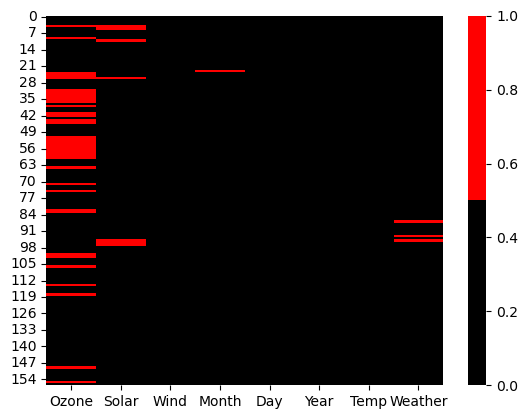

In [138]:
# Visualize data1 missing values
cols = data1.columns
colors = ['black', 'red']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)


In [140]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [142]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [144]:
median_solar = data1["Solar"].median()
mean_solar = data1["Solar"].mean()
print("Median of Solar: ", median_solar)
print("Mean of Solar: ", mean_solar)

Median of Solar:  199.0
Mean of Solar:  185.36666666666667


In [146]:
data1['Solar'] = data1['Solar'].fillna(median_solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [148]:
data1['Solar'] = data1['Solar'].fillna(mean_solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [150]:
data1.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,199.0,14.3,5.0,5,2010,56,S


In [152]:
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [154]:
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [156]:
mode_month = data1["Month"].mode()[0]

In [158]:
data1["Month"] = data1["Month"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [160]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [162]:
# Reset the index column
data1.reset_index(drop=True)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,199.0,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,31.0,145.0,13.2,9.0,27,2010,77,S


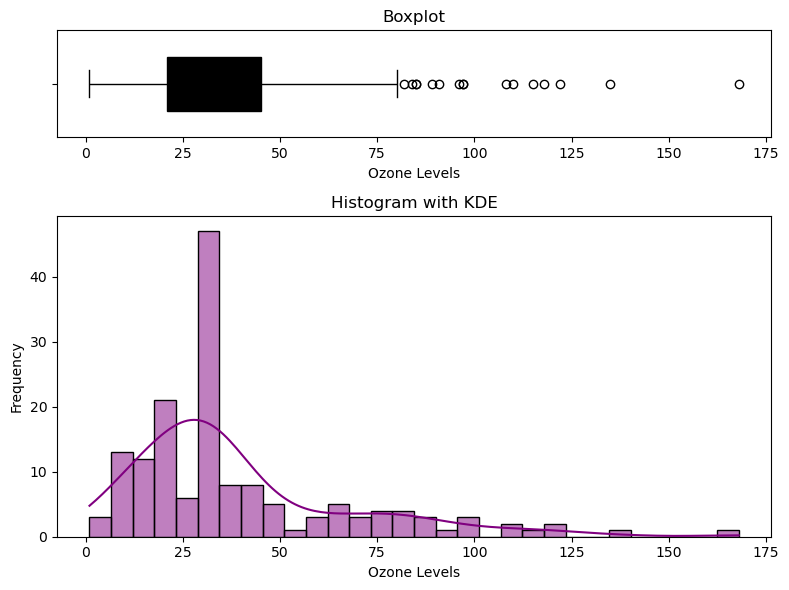

In [164]:
# Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# plot the box plot
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='black', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

# plot the histogram with KDE curve
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Observations
->The ozone column has extreme values beyond 81 as seen from box plot    
->The same is confirmed from the below right=skewed histogram

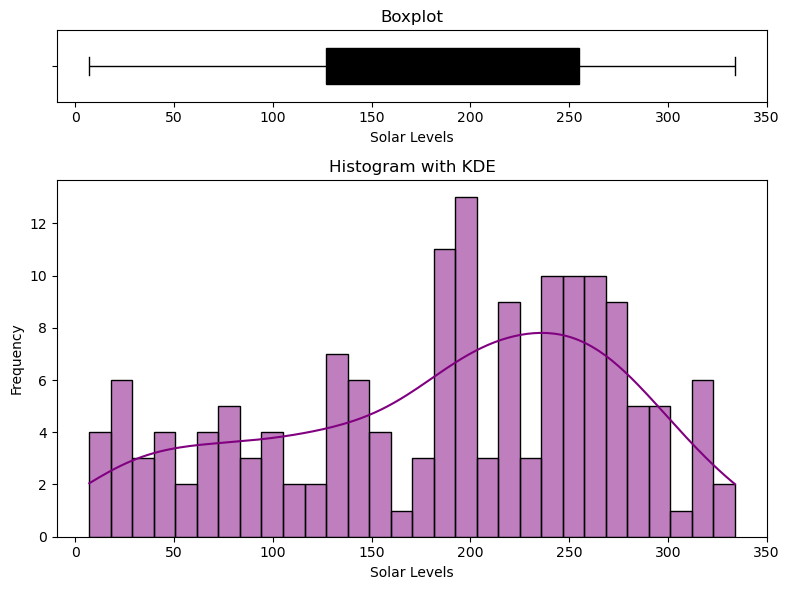

In [167]:
# Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 5]})

# plot the box plot
sns.boxplot(data=data1["Solar"], ax=axes[0], color='black', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Solar Levels")

# plot the histogram with KDE curve
sns.histplot(data1["Solar"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Levels")
axes[1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

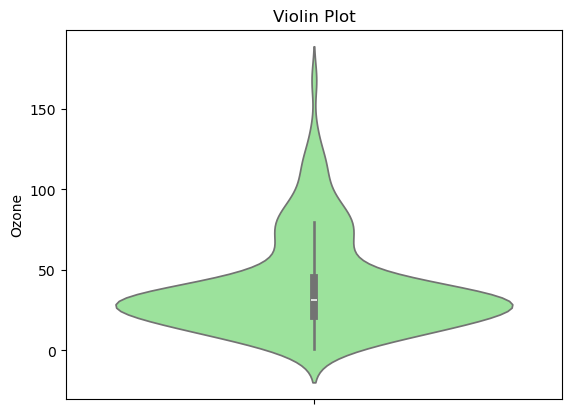

In [169]:
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x165103c2f00>,
 'caps': [<matplotlib.lines.Line2D at 0x165103c34d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x165103c2d20>],
 'medians': [<matplotlib.lines.Line2D at 0x165103c38f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x165103c3b60>],
 'means': []}

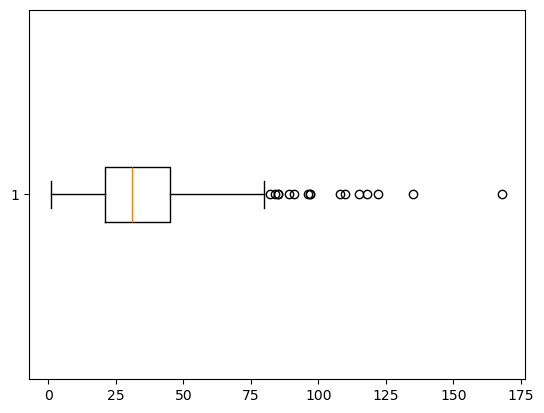

In [171]:
plt.boxplot(data1["Ozone"], vert= False)

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

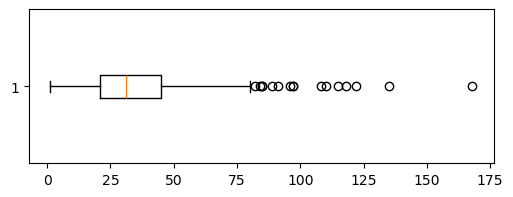

In [173]:
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"], vert= False)
[item.get_xdata() for item in boxplot_data['fliers']]

In [175]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [177]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

135.0
168.0


Text(0.5, 0, 'Theoretical Quantiles')

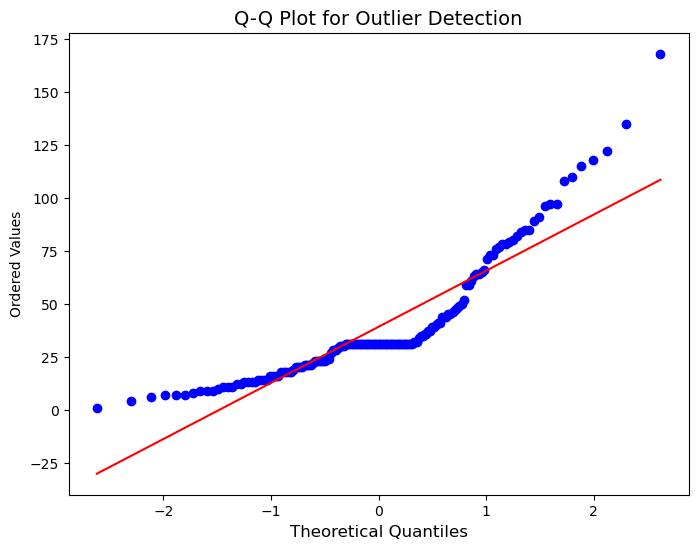

In [179]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

# Observations from Q-Q plot
->The data does not follow normal distribution as the data points are deviating significantly away from the red line.                  
->The data shows a right-skewed distribution and possible outlies

Text(0.5, 0, 'Theoretical Quantiles')

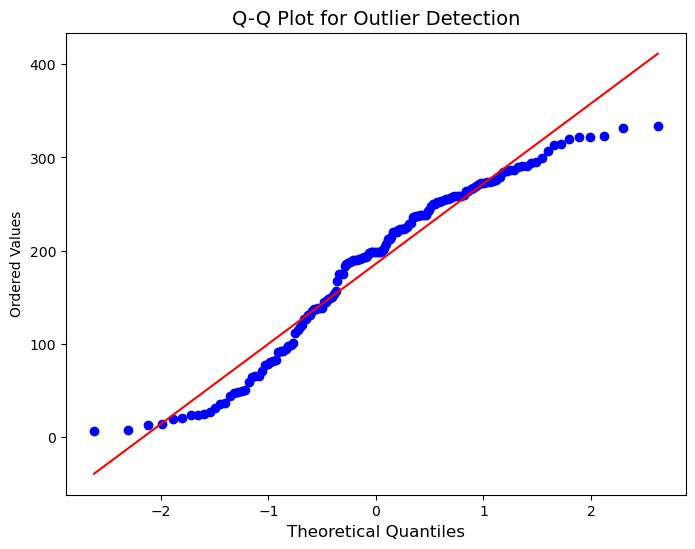

In [182]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(data1["Solar"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

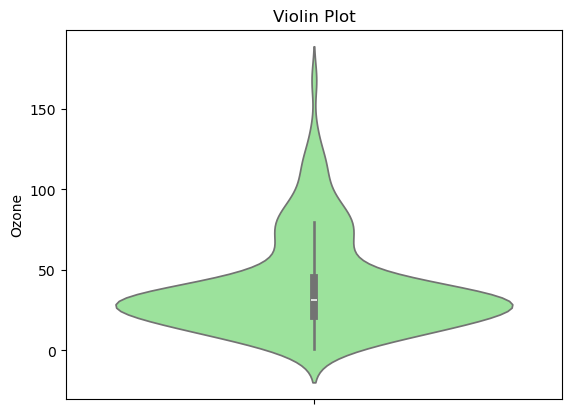

In [184]:
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")

plt.show()

<Axes: xlabel='Weather', ylabel='Ozone'>

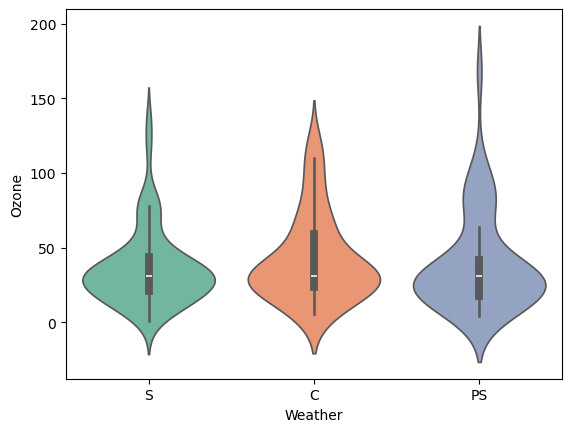

In [186]:
sns.violinplot(data=data1, x = "Weather", y="Ozone", palette="Set2")

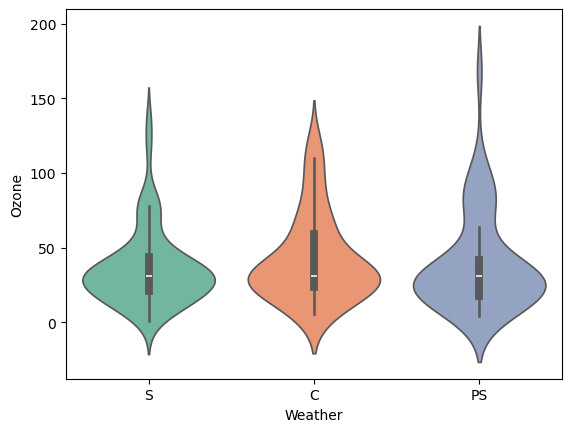

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

sns.violinplot(data=data1, x="Weather", y="Ozone", palette="Set2")

plt.show()


<Axes: xlabel='Weather', ylabel='Ozone'>

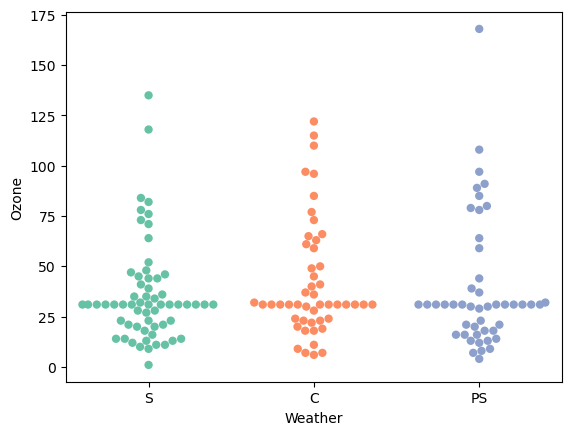

In [190]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)

<Axes: xlabel='Weather', ylabel='Ozone'>

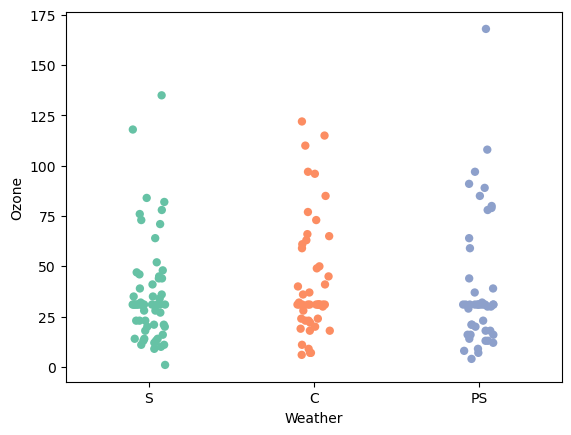

In [192]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="red",palette="Set2", size=6, jitter = True)

<Axes: xlabel='Ozone', ylabel='Density'>

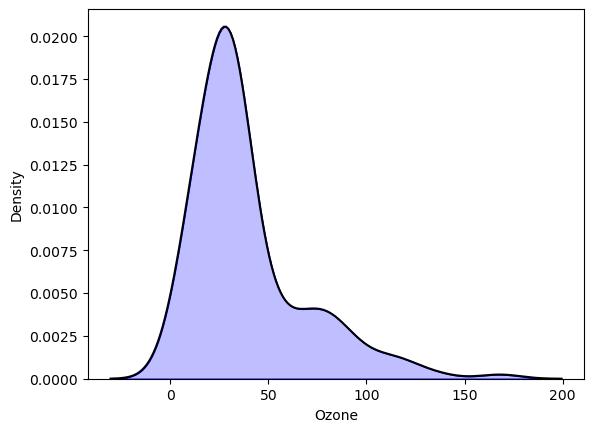

In [194]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.kdeplot(data=data1["Ozone"], color="black")



<Axes: xlabel='Ozone', ylabel='Density'>

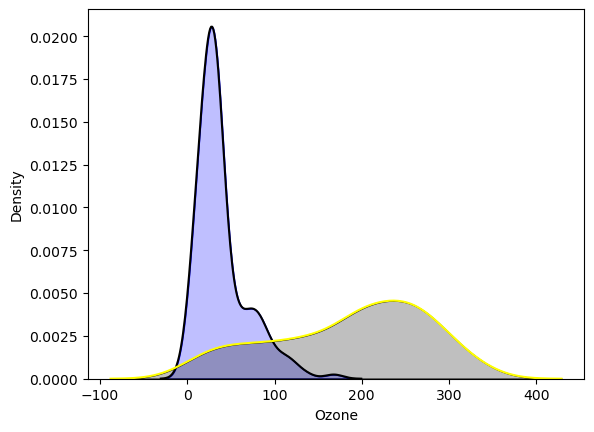

In [196]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.kdeplot(data=data1["Solar"], fill=True, color="black")

sns.kdeplot(data=data1["Ozone"], color="black")
sns.kdeplot(data=data1["Solar"], color="yellow")

<Axes: xlabel='Weather', ylabel='Ozone'>

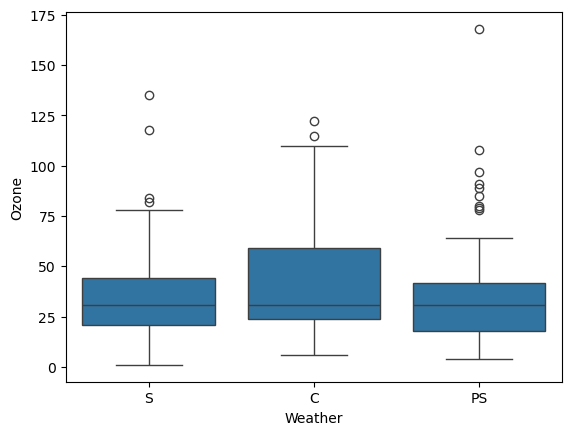

In [199]:
sns.boxplot(data = data1, x = "Weather", y="Ozone") 

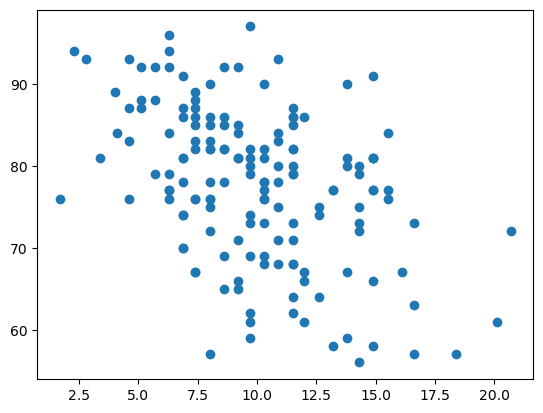

In [203]:
plt.scatter(data1["Wind"], data1["Temp"])               

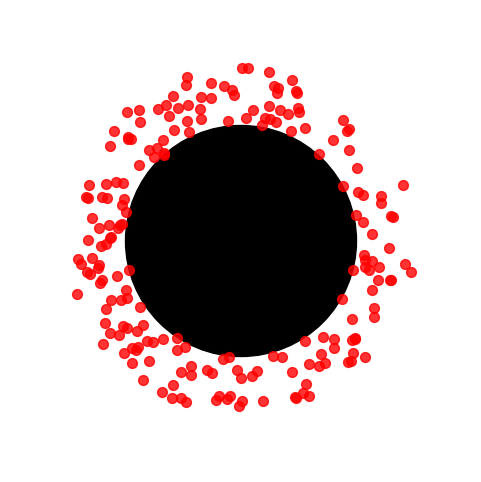

In [209]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

circle = plt.Circle((0, 0), 1, color='black', fill=True)  # Big red circle
ax.add_patch(circle)

num_particles = 200  # Number of particles
angles = np.random.uniform(0, 2 * np.pi, num_particles)  # Random angles
radii = np.random.uniform(1, 1.5, num_particles)  # Random distances from center
x_vals = radii * np.cos(angles)  # X coordinates
y_vals = radii * np.sin(angles)  # Y coordinates

ax.scatter(x_vals, y_vals, color='red', alpha=0.8, s=50)  # Yellow explosion

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')  # Keep circle shape
ax.axis('off')  # Hide axes

plt.show()


In [211]:
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215